[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


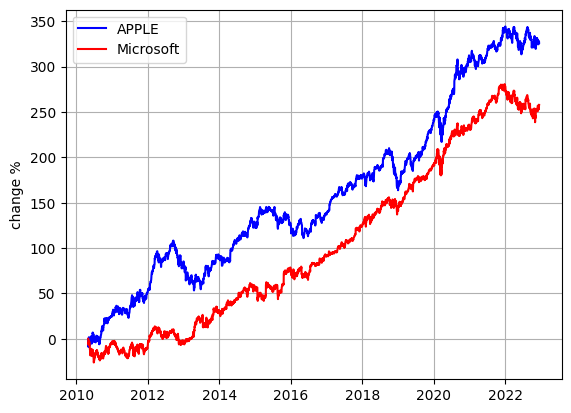

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


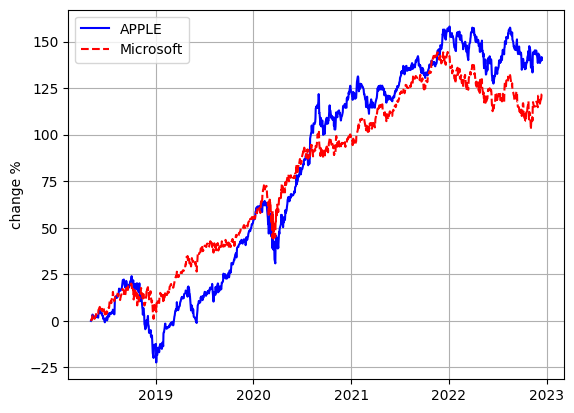

In [5]:
# APPL, MSFT 주식 수익률 비교
from pandas_datareader import data as pdr
from pandas_datareader import data as pdr
import yfinance as yf
import matplotlib.pyplot as plt
yf.pdr_override()

aapl = pdr.get_data_yahoo('aapl',start="2018-05-04") # 939
aapl_dpc = (aapl["Close"]-aapl['Close'].shift(1)) / aapl['Close'].shift(1) * 100
aapl_dpc.iloc[0] = 0 # 일간 변동률의 첫 번째 값인 NaN을 0으로 변경한다.
aapl_dpc_cs = aapl_dpc.cumsum()

msft = pdr.get_data_yahoo('MSFT',start="2018-05-04")
msft_dpc = (msft["Close"]-msft['Close'].shift(1)) / msft['Close'].shift(1) * 100
msft_dpc.iloc[0] = 0
msft_dpc_cs = msft_dpc.cumsum()

plt.plot(aapl.index, aapl_dpc_cs, 'b', label="APPLE``")
plt.plot(msft.index, msft_dpc_cs, 'r--', label="Microsoft")
plt.ylabel("change %")
plt.grid(True)
plt.legend(loc='best')
plt.show()



[*********************100%***********************]  1 of 1 completed


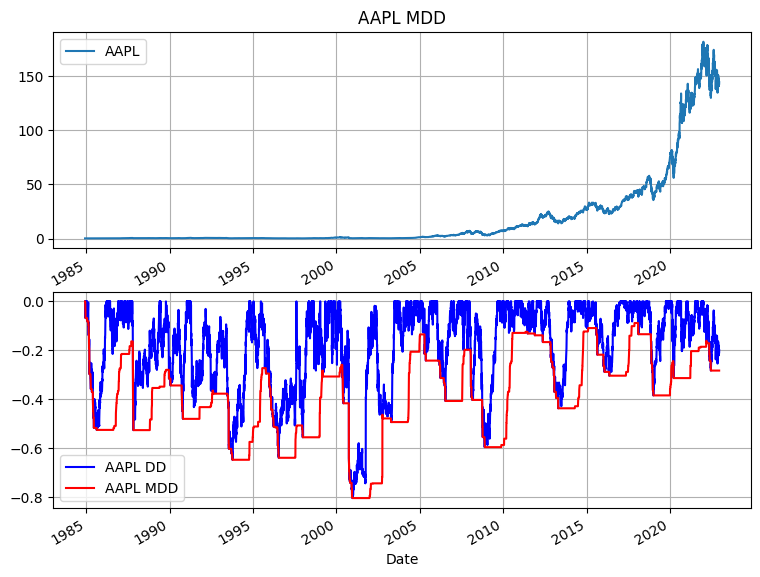

In [3]:
# Max Draw Down 최대 손실 낙폭
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
import matplotlib.pyplot as plt

# 1984년 12월 01일부터 AAPL데이터를 불러온다.
aapl = pdr.get_data_yahoo("aapl", "1984-12-01")

window = 252 # 어림잡아 1년동안 개장일
peak = aapl['Adj Close'].rolling(window, min_periods=1).max()
drawdown = aapl['Adj Close']/peak - 1.0
max_dd = drawdown.rolling(window, min_periods=1).min()

plt.figure(figsize=(9,7))
plt.subplot(211) # 2행 1열 중 1행에 그린다.
aapl["Close"].plot(label="AAPL",title="AAPL MDD", grid=True, legend=True)
plt.subplot(212) # 2행 1열중 2행에 그린다.
drawdown.plot(c='blue', label="AAPL DD", grid=True, legend=True)
max_dd.plot(c="red", label="AAPL MDD", grid=True, legend=True)
plt.show()